In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from PIL import Image

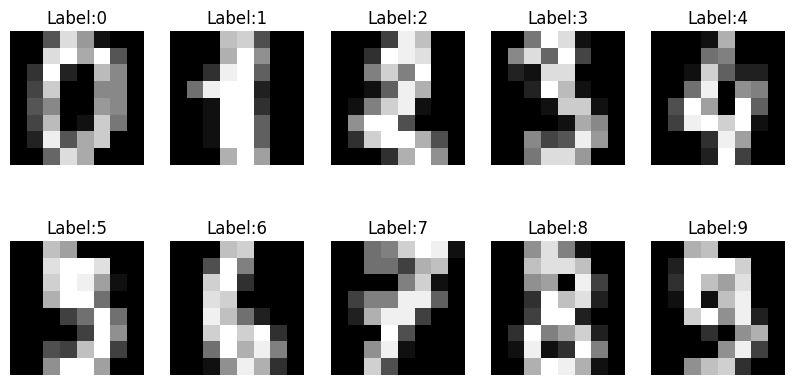

Accuracy = 0.98
Confusion Matrix :
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy  

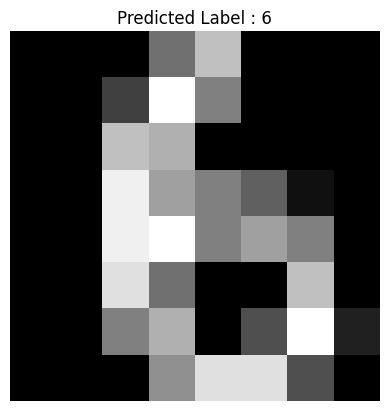

In [17]:
digits = datasets.load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label:{digits.target[i]}')
    ax.axis('off')

plt.show()







n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)





model = SVC(kernel='linear')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy = {accuracy:.2f}')
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))






new_data = x_test[0].reshape(1,-1)

predicted_class = model.predict(new_data)
print(f'The predicted class for the new data is : {predicted_class[0]}')

plt.imshow(new_data.reshape(8,8), cmap='gray')
plt.title(f'Predicted Label : {predicted_class[0]}')
plt.axis('off')
plt.show()

In [10]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('fruit_images.csv')

def preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  
        img = img.resize((64, 64), Image.LANCZOS)  
        img = np.array(img)
        img = img / 255.0  
        img = img.flatten()  
        return img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

X = []
y = []
for index, row in df.iterrows():
    image_path = row['image_path']
    label = row['label']
    if os.path.exists(image_path):
        processed_image = preprocess_image(image_path)
        if processed_image is not None:
            X.append(processed_image)
            y.append(label)

if len(X) == 0:
    print("No images were processed. Please check the image paths and try again.")
else:
    X = np.array(X)
    y = np.array(y)

    le = LabelEncoder()
    y = le.fit_transform(y)

    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except ValueError as e:
        print(f"Error during train-test split: {e}")
        X_train, X_test, y_train, y_test = None, None, None, None

    if X_train is not None:
        model = SVC(kernel='linear')  # You can choose other kernels like 'rbf'

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))

        new_image1_path = 'images/testimage1-greenapple.jpeg'
        new_image2_path = 'images/testimage2-apples.jpeg'
        new_image3_path = 'images/testimage3-apple.jpeg'
        new_image4_path = 'images/testimage4-person.jpg'
        if os.path.exists(new_image1_path):
            new_data = preprocess_image(new_image1_path).reshape(1, -1)
            predicted_class = model.predict(new_data)
            predicted_label = le.inverse_transform(predicted_class)
            print(f'The predicted class for the new data is: {predicted_label[0]}')
        else:
            print(f'Image {new_image1_path} not found.')

        if os.path.exists(new_image2_path):
            new_data = preprocess_image(new_image2_path).reshape(1, -1)
            predicted_class = model.predict(new_data)
            predicted_label = le.inverse_transform(predicted_class)
            print(f'The predicted class for the new data is: {predicted_label[0]}')
        else:
            print(f'Image {new_image2_path} not found.')

        if os.path.exists(new_image3_path):
            new_data = preprocess_image(new_image3_path).reshape(1, -1)
            predicted_class = model.predict(new_data)
            predicted_label = le.inverse_transform(predicted_class)
            print(f'The predicted class for the new data is: {predicted_label[0]}')
        else:
            print(f'Image {new_image3_path} not found.')
            
        if os.path.exists(new_image4_path):
            new_data = preprocess_image(new_image4_path).reshape(1, -1)
            predicted_class = model.predict(new_data)
            predicted_label = le.inverse_transform(predicted_class)
            print(f'The predicted class for the new data is: {predicted_label[0]}')
        else:
            print(f'Image {new_image4_path} not found.')
    else:
        print("Training and testing sets could not be created. Please check the data and try again.")


Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

The predicted class for the new data is: banana
The predicted class for the new data is: banana
The predicted class for the new data is: apple
The predicted class for the new data is: banana
